IMPORTING LIBRARIES

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.manifold import TSNE
from math import sqrt
from scipy.stats import probplot
from sklearn.manifold import TSNE


In [ ]:
# Load the dataset

df = pd.read_csv('/content/insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


EXPLORATORY DATA ANALYSIS

Data Quality: Handling Duplicate Data

In [ ]:
duplicated_rows = df[df.duplicated()]
print("number of duplicate rows: ", duplicated_rows.shape)

number of duplicate rows:  (1, 7)


In [ ]:
df = df.drop_duplicates()

Handling Unique Data

In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

age: 47 distinct values
sex: 2 distinct values
bmi: 548 distinct values
children: 6 distinct values
smoker: 2 distinct values
region: 4 distinct values
charges: 1337 distinct values


HANDLING MISSING VALUES

In [ ]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


STATISTICAL DESCPRITION OF DATASET

In [ ]:
df.describe().style.format("{:.2f}")

,age,bmi,children,charges
count,1337.00,1337.00,1337.00,1337.00
mean,39.22,30.66,1.10,13279.12
std,14.04,6.10,1.21,12110.36
min,18.00,15.96,0.00,1121.87
25%,27.00,26.29,0.00,4746.34
50%,39.00,30.40,1.00,9386.16
75%,51.00,34.70,2.00,16657.72
max,64.00,53.13,5.00,63770.43


UNIVARIATE ANALYSIS


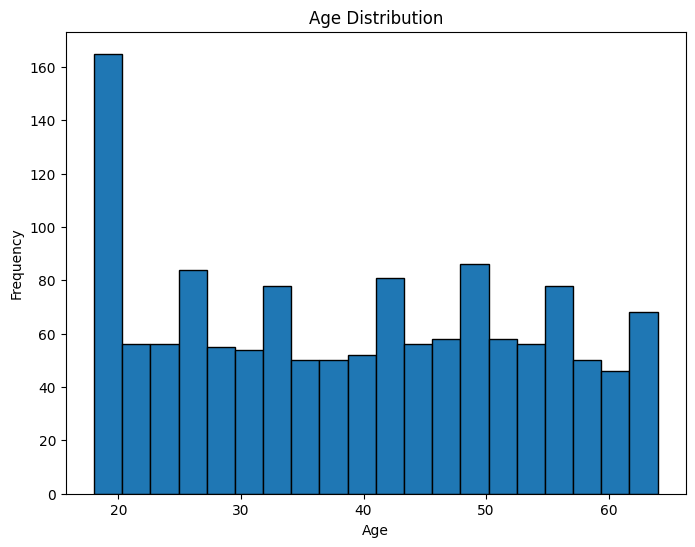

In [ ]:
# Histogram for age distribution

plt.figure(figsize=(8,6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


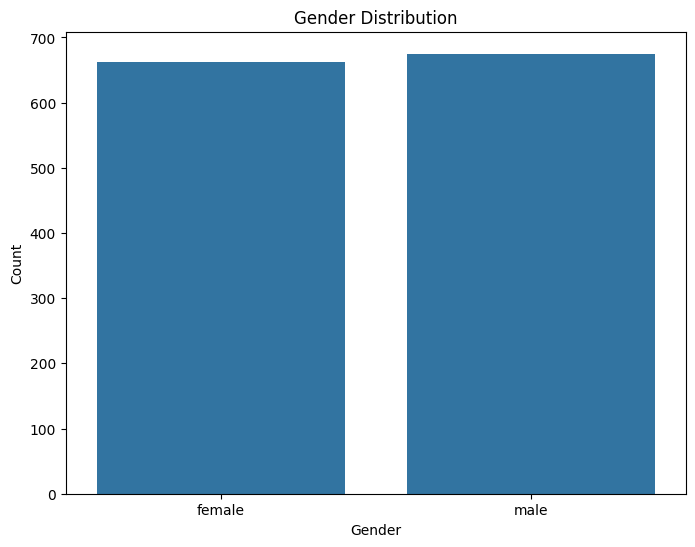

In [ ]:
#Bar plot for age distribution.

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

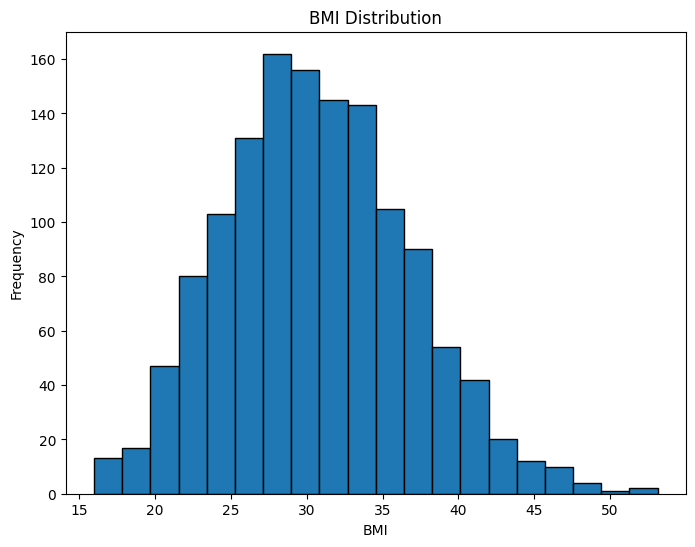

In [ ]:
#Histogram for BMI values

plt.figure(figsize=(8,6))
plt.hist(df['bmi'], bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

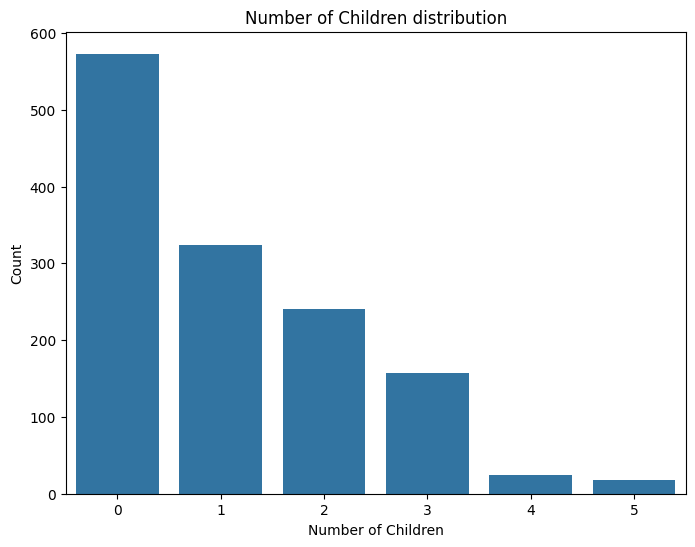

In [ ]:
#Bar plot for number of children/dependents

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children distribution')
plt.show()

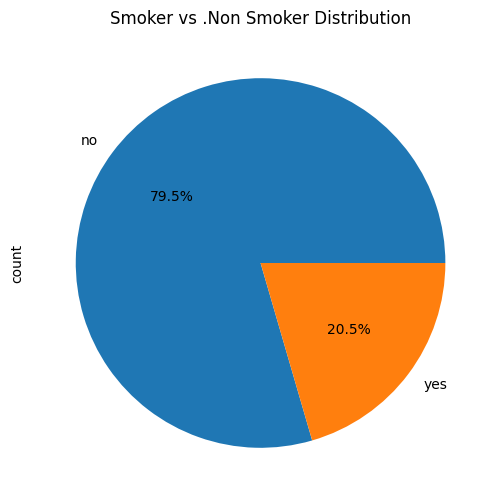

In [ ]:
#Pie chart to visualize the distribution of smokers

plt.figure(figsize=(8,6))
df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoker vs .Non Smoker Distribution')
plt.show()

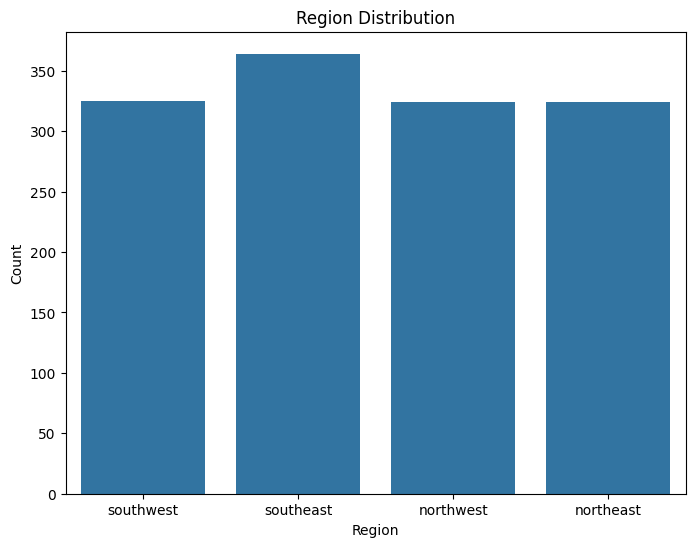

In [ ]:
#Bar plot for region distribution

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')
plt.show()

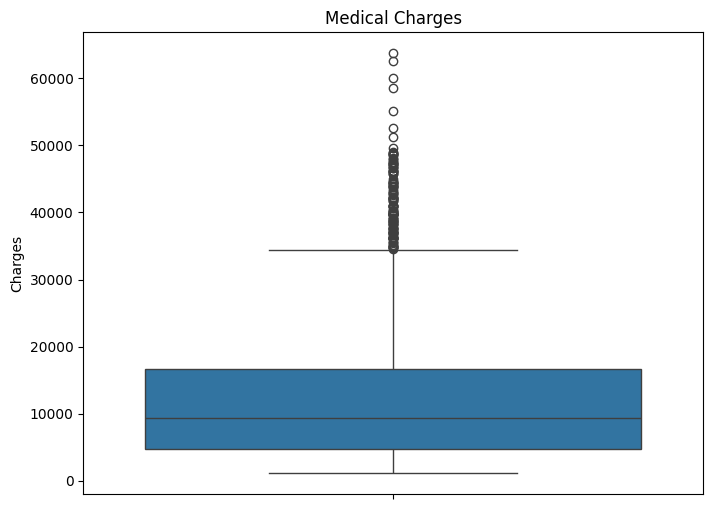

In [ ]:
#Box plot for medical charges

plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='charges')
plt.ylabel('Charges')
plt.title('Medical Charges')
plt.show()

BIVARIATE ANALYSIS

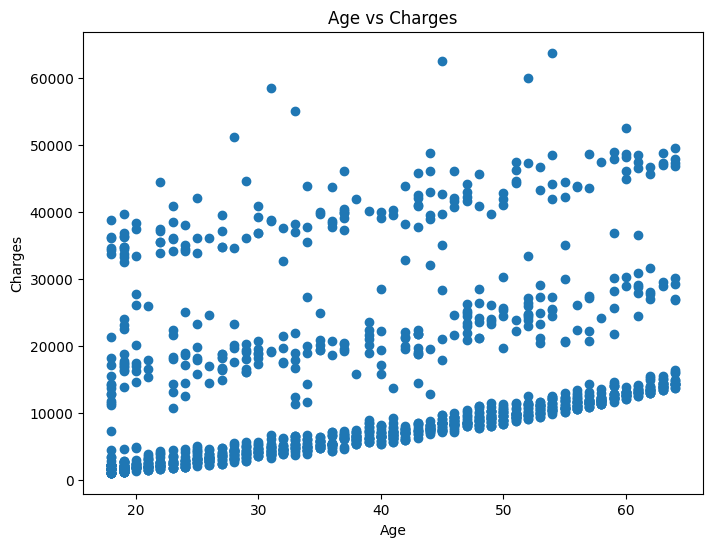

In [ ]:
#Scatter plot for Age vs Charges

plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

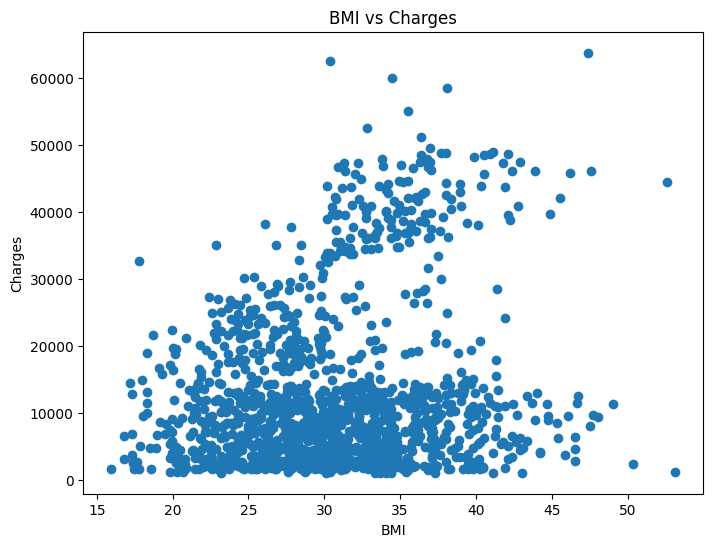

In [ ]:
#Scatter plot for BMI vs Charges

plt.figure(figsize=(8,6))
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.show()

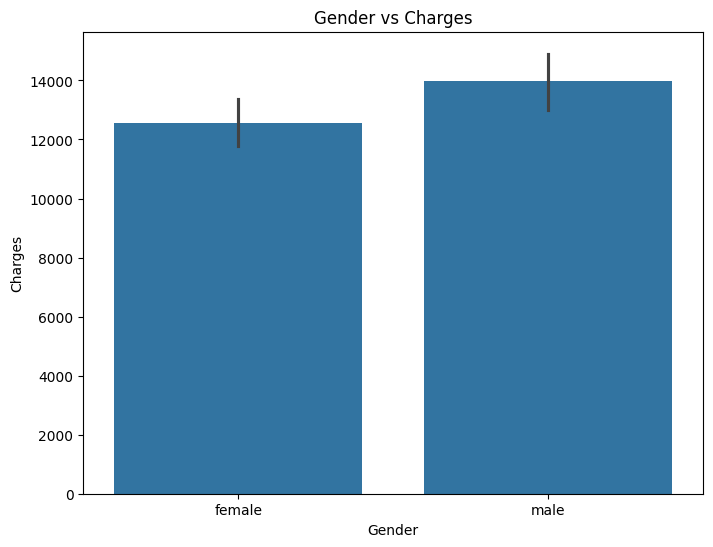

In [ ]:
#Stacked bar plot for Gender vs Charges

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='sex', y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Gender vs Charges')
plt.show()

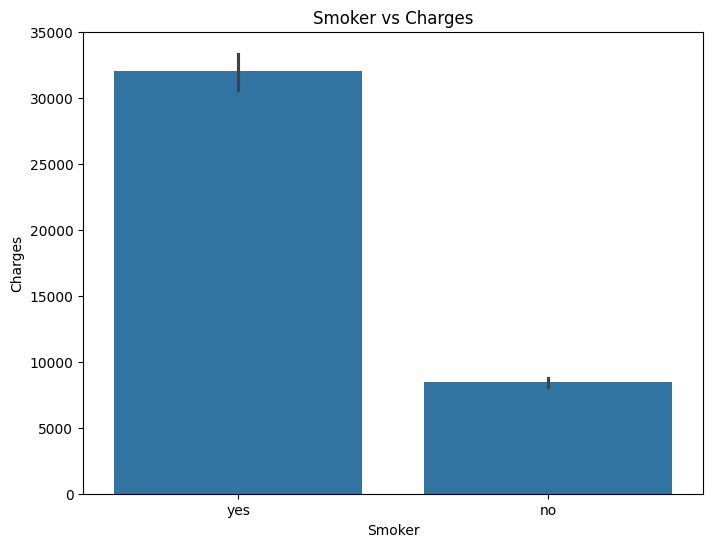

In [ ]:
#Stacked bar plot for Smoker vs Charges

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs Charges')
plt.show()

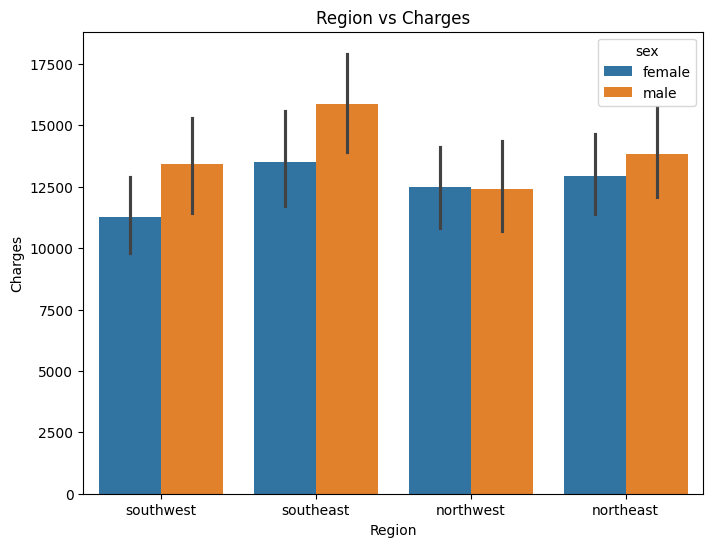

In [ ]:
#Stacked bar plot for Region vs Charges

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs Charges')
plt.show()

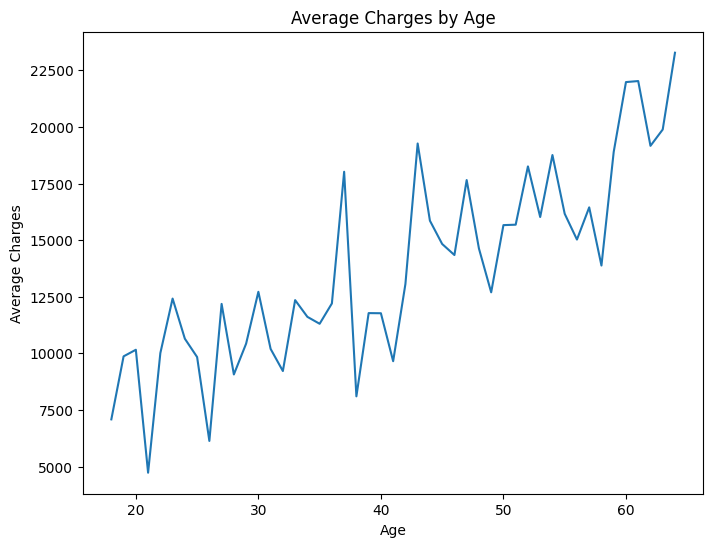

In [ ]:
#Line plot for average charges by age

avg_charges_by_age = df.groupby('age')['charges'].mean()
plt.figure(figsize=(8,6))
plt.plot(avg_charges_by_age.index, avg_charges_by_age.values)
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age')
plt.show()

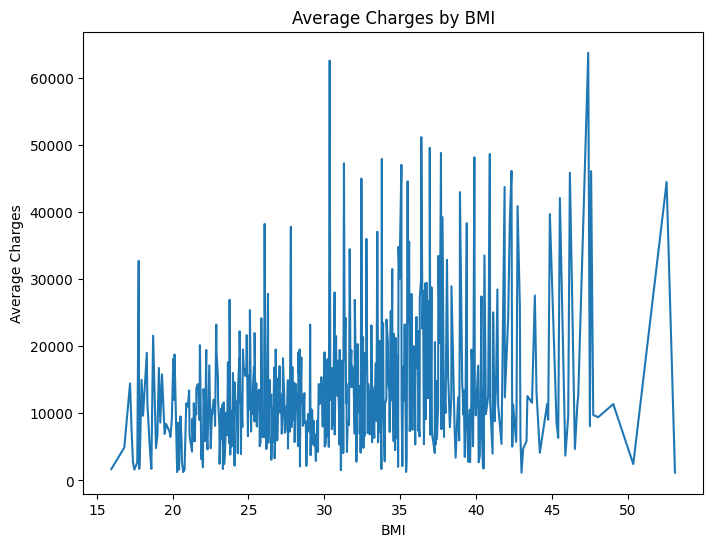

In [ ]:
#Line plot for average charges by BMI

avg_charges_by_bmi = df.groupby('bmi')['charges'].mean()
plt.figure(figsize=(8,6))
plt.plot(avg_charges_by_bmi.index, avg_charges_by_bmi.values)
plt.xlabel('BMI')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI')
plt.show()

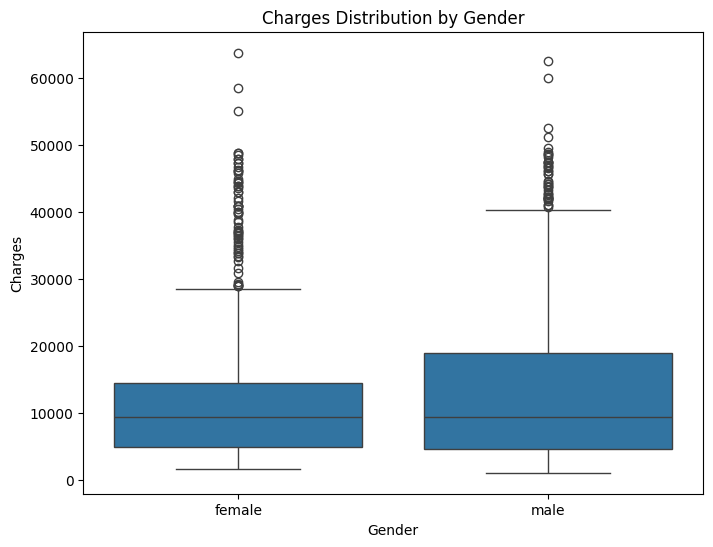

In [ ]:
#Box plot for charges by gender

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='sex',y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Charges Distribution by Gender')
plt.show()

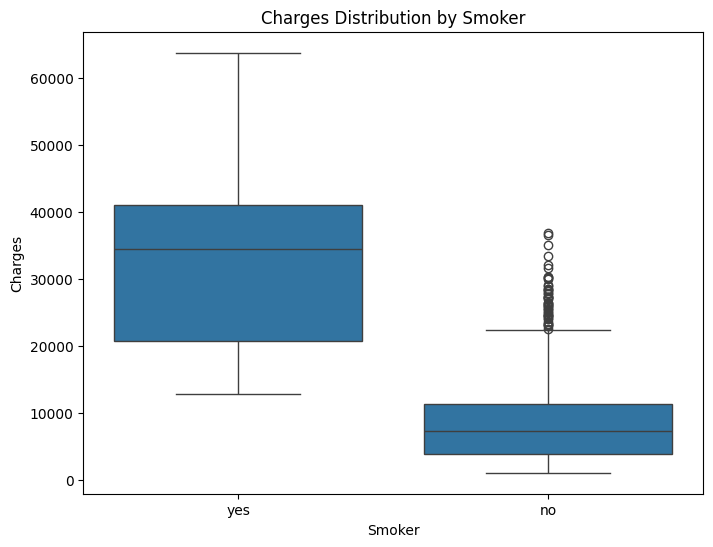

In [ ]:
#Box plot for charges by smoker status

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='smoker',y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution by Smoker')
plt.show()

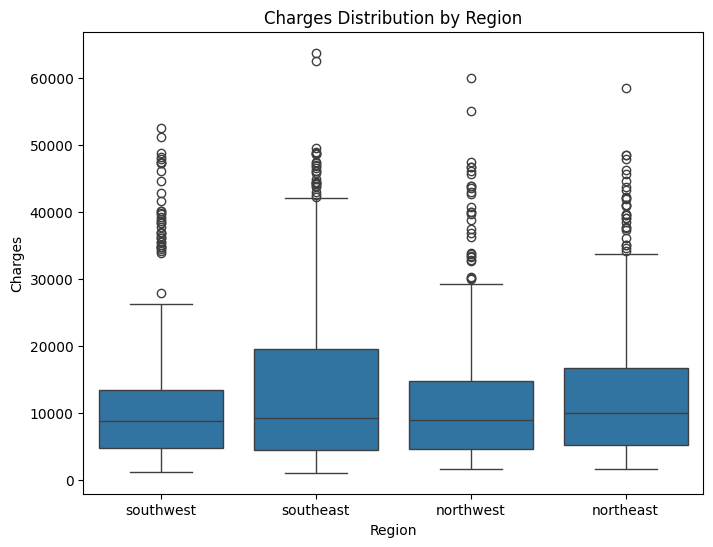

In [ ]:
#Box plot for charges by region

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='region',y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()

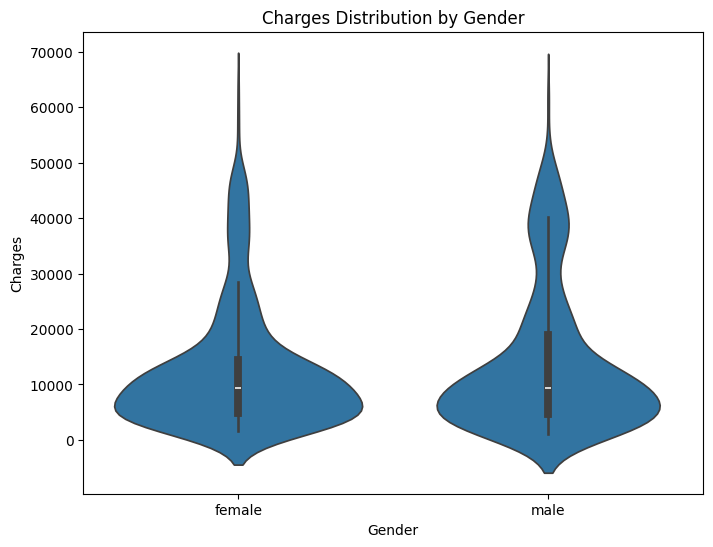

In [ ]:
#Violin plot for charges by gender

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='sex',y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Charges Distribution by Gender')
plt.show()

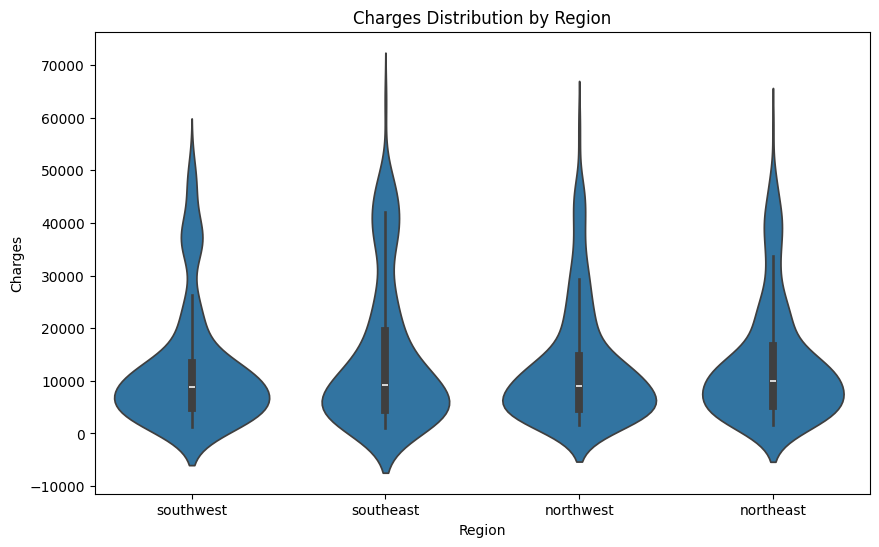

In [ ]:
#Violin plot for charges by region

plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='region',y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()

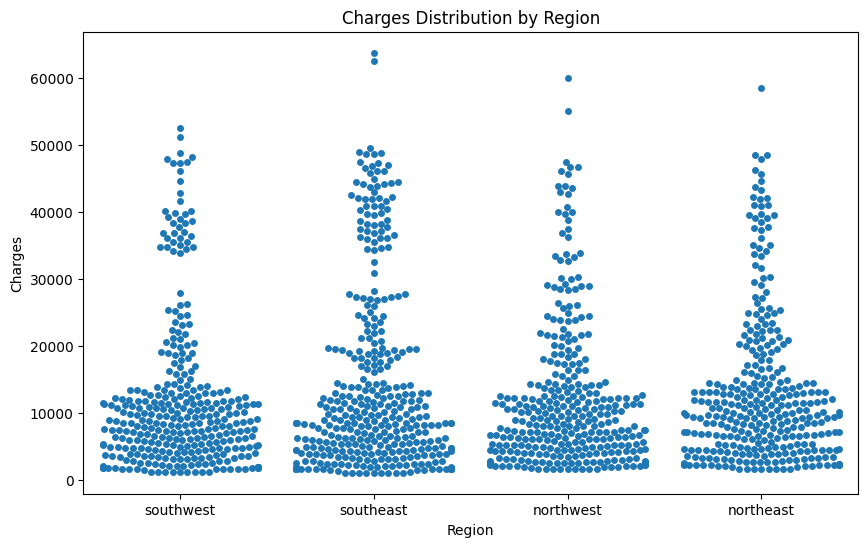

In [ ]:
#Swarm plot for charges by region

plt.figure(figsize=(10,6))
sns.swarmplot(data=df, x='region',y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()

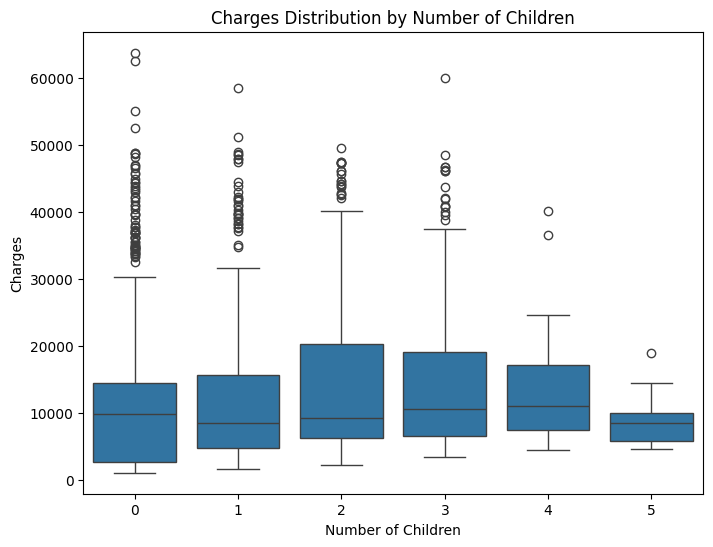

In [ ]:
#Box plot for charges by number of children/dependents

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='children', y='charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Charges Distribution by Number of Children')
plt.show()

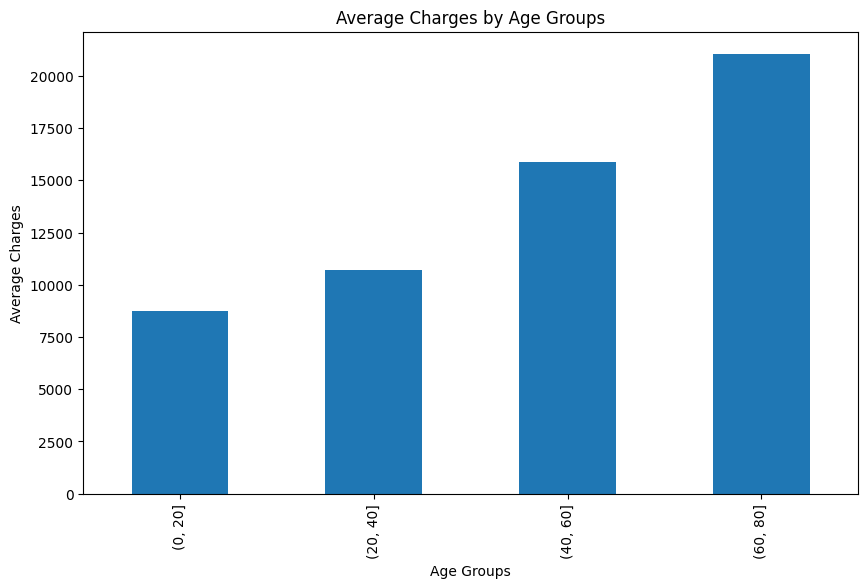

In [ ]:
#Box plot for average charges by age range

age_groups = pd.cut(df['age'], bins=[0,20,40,60,80])
avg_charges_by_age_groups = df.groupby(age_groups)['charges'].mean()
plt.figure(figsize=(10,6))
avg_charges_by_age_groups.plot(kind='bar')
plt.xlabel('Age Groups')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age Groups')
plt.show()

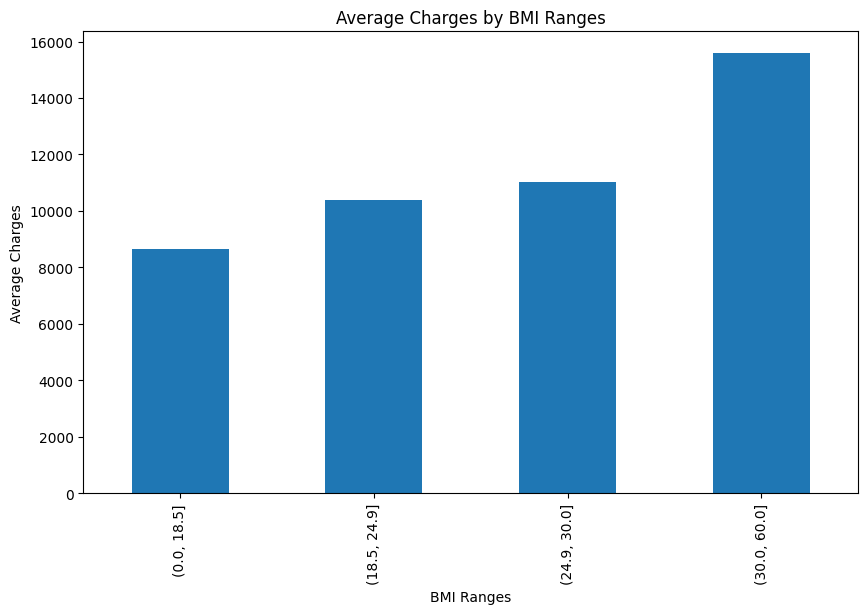

In [ ]:
#Bar plot for average charges by BMI range

bmi_ranges = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 30, 60])
avg_charges_by_bmi_ranges = df.groupby(bmi_ranges)['charges'].mean()
plt.figure(figsize=(10, 6))
avg_charges_by_bmi_ranges.plot(kind='bar')
plt.xlabel('BMI Ranges')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI Ranges')
plt.show()

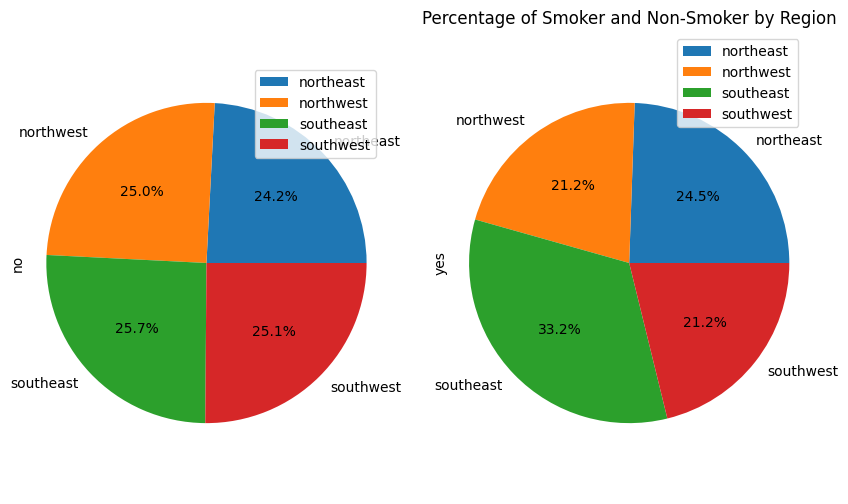

In [ ]:
#Pie chart with percentage for smoker and non-smoker by region

region_smoker_counts = df.groupby(['region','smoker']).size().unstack()
region_smoker_counts.plot(kind='pie', figsize=(10,6), autopct='%1.1f%%', subplots=True)
plt.legend(loc='upper right')
plt.title('Percentage of Smoker and Non-Smoker by Region')
plt.axis('equal')
plt.show()

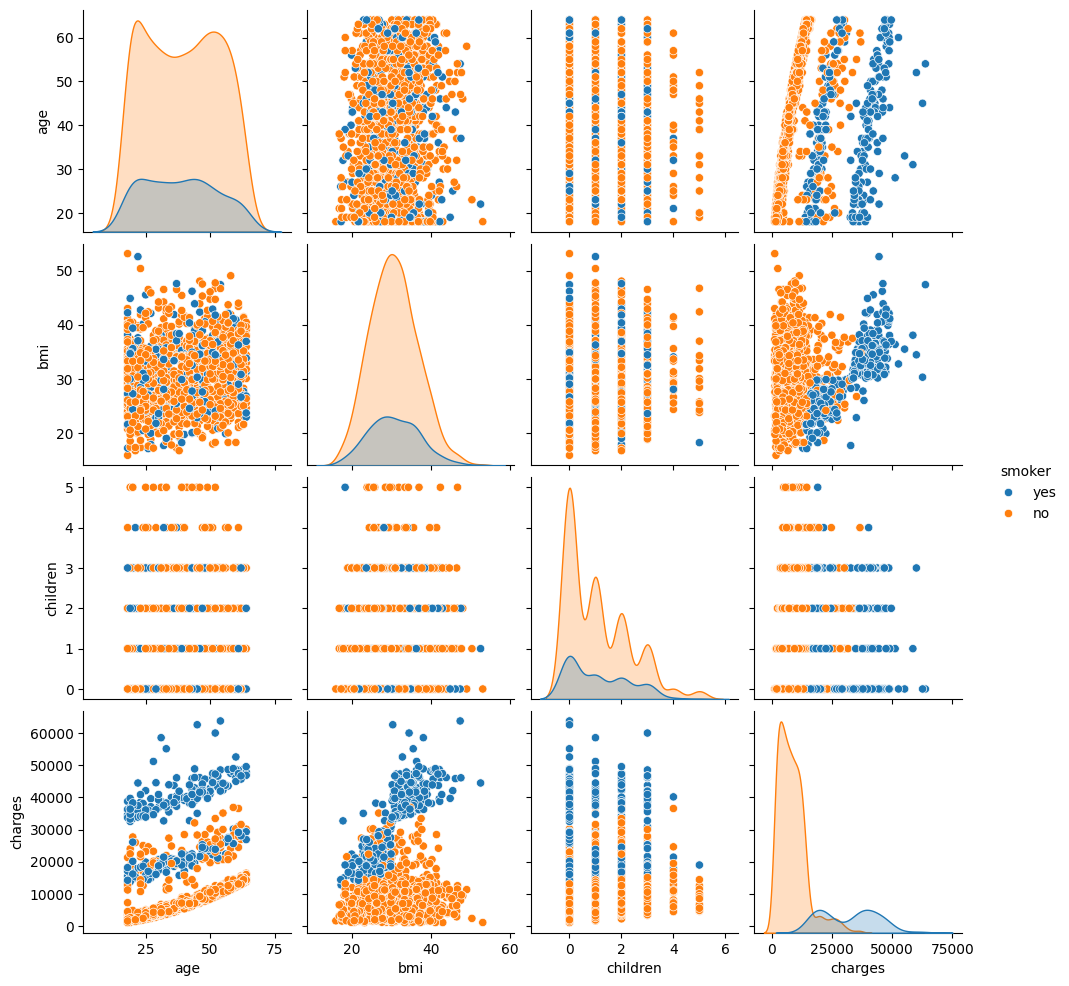

In [ ]:
#Pair plot

sns.pairplot(df, hue='smoker')
plt.show()

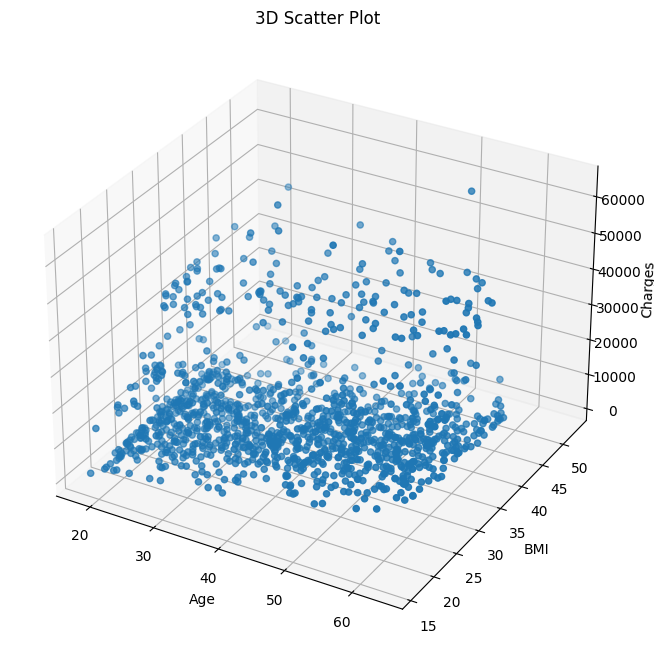

In [ ]:
#3D dimensional distribution plot

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['bmi'], df['charges'])
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
plt.title('3D Scatter Plot')
plt.show()


MULTIVARIATE ANALYSIS


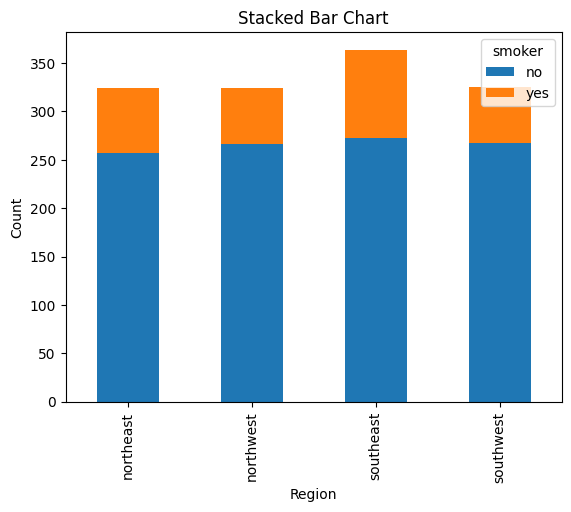

In [ ]:
#Stacked bar chart by region and smoker status

stacked_data = df.groupby(['region', 'smoker']).size().unstack()
stacked_data.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Chart')
plt.show()

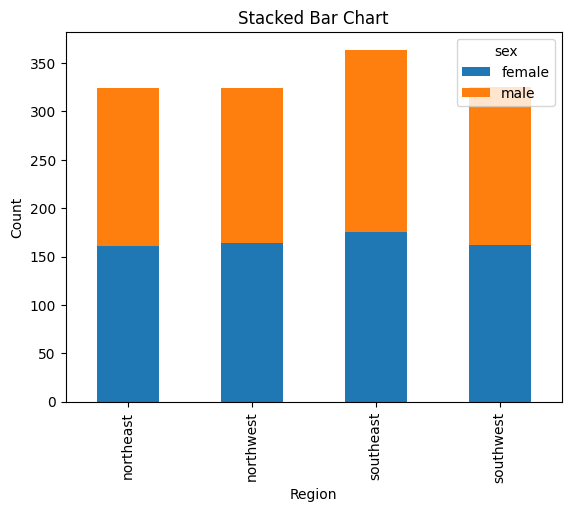

In [ ]:
#Stacked bar chart by region and gender

stacked_data = df.groupby(['region', 'sex']).size().unstack()
stacked_data.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Chart')
plt.show()

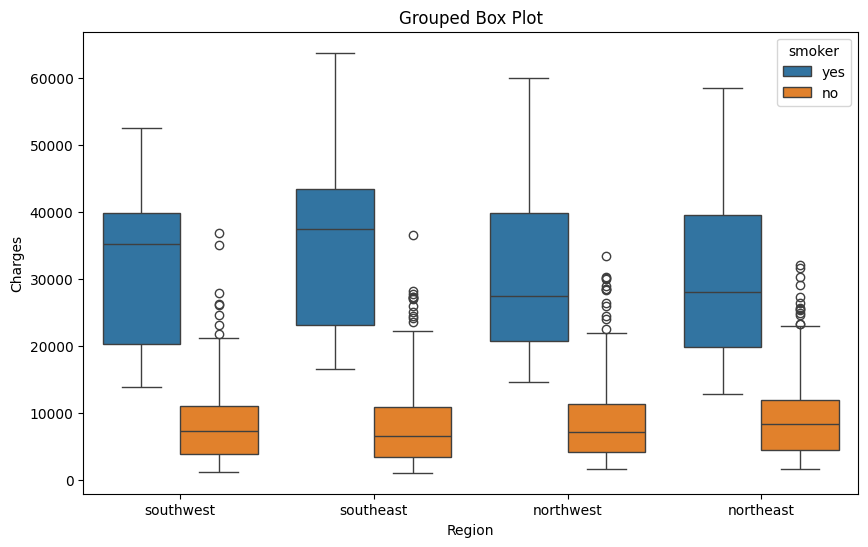

In [ ]:
# Grouped box plot by region and smoker status

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges', hue='smoker')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Grouped Box Plot')
plt.show()

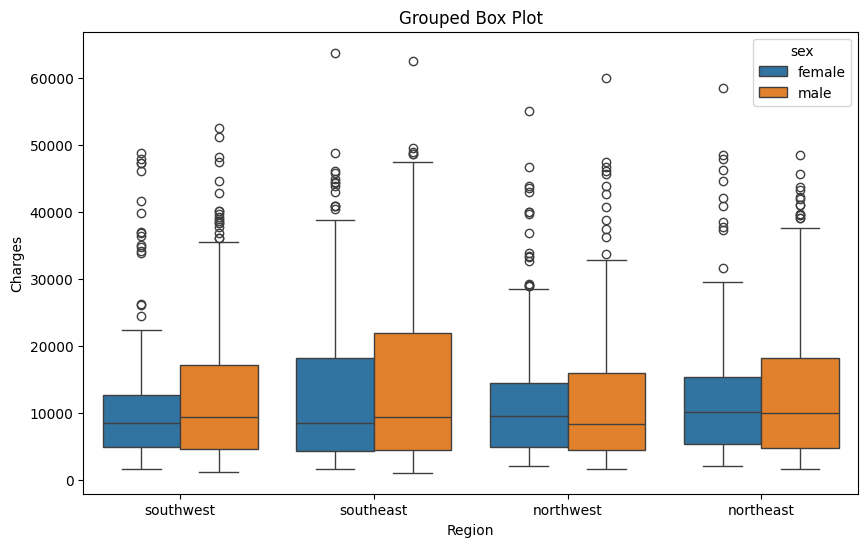

In [ ]:
# Grouped box plot by region and gender

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Grouped Box Plot')
plt.show()

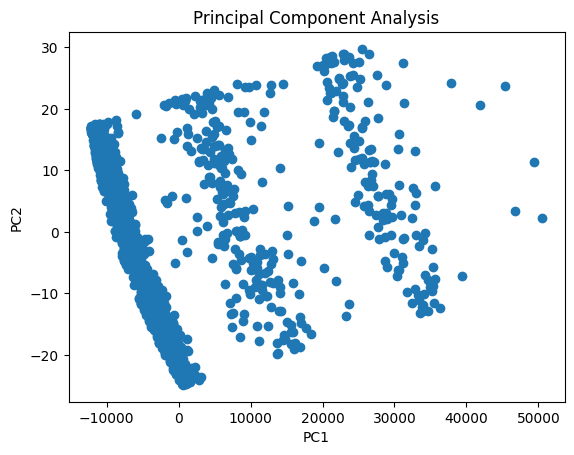

In [ ]:
# Principal Component Analysis (PCA)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['age','bmi','charges']])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1','PC2'])
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis')
plt.show()

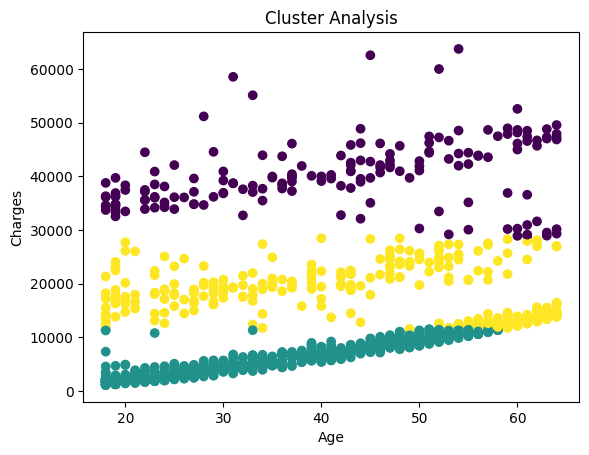

In [ ]:
# Cluster Analysis

features = ['age', 'bmi', 'charges']
X = df[features]
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)
plt.scatter(df['age'], df['charges'], c=df['cluster'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Cluster Analysis')
plt.show()

MATRIX CORRELATION


In [ ]:
data = df.copy()

In [ ]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,cluster
0,19,female,27.900,0,1,southwest,16884.92400,2
1,18,male,33.770,1,0,southeast,1725.55230,1
2,28,male,33.000,3,0,southeast,4449.46200,1
3,33,male,22.705,0,0,northwest,21984.47061,2
4,32,male,28.880,0,0,northwest,3866.85520,1


In [ ]:
categorical_columns = ['region','sex']
numerical_columns = ['age','bmi','children','smoker','charges']
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

DATA PREPROCESSING AND ENCODING

In [ ]:
scaler = StandardScaler()

# Perform scaling on numerical variables
scaled_numerical = scaler.fit_transform(data[numerical_columns])

# Convert the scaled numerical variables to a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)


In [ ]:
# Remove the original numerical variables
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and the scaled numerical variables
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)


MATRIX CORRELATION

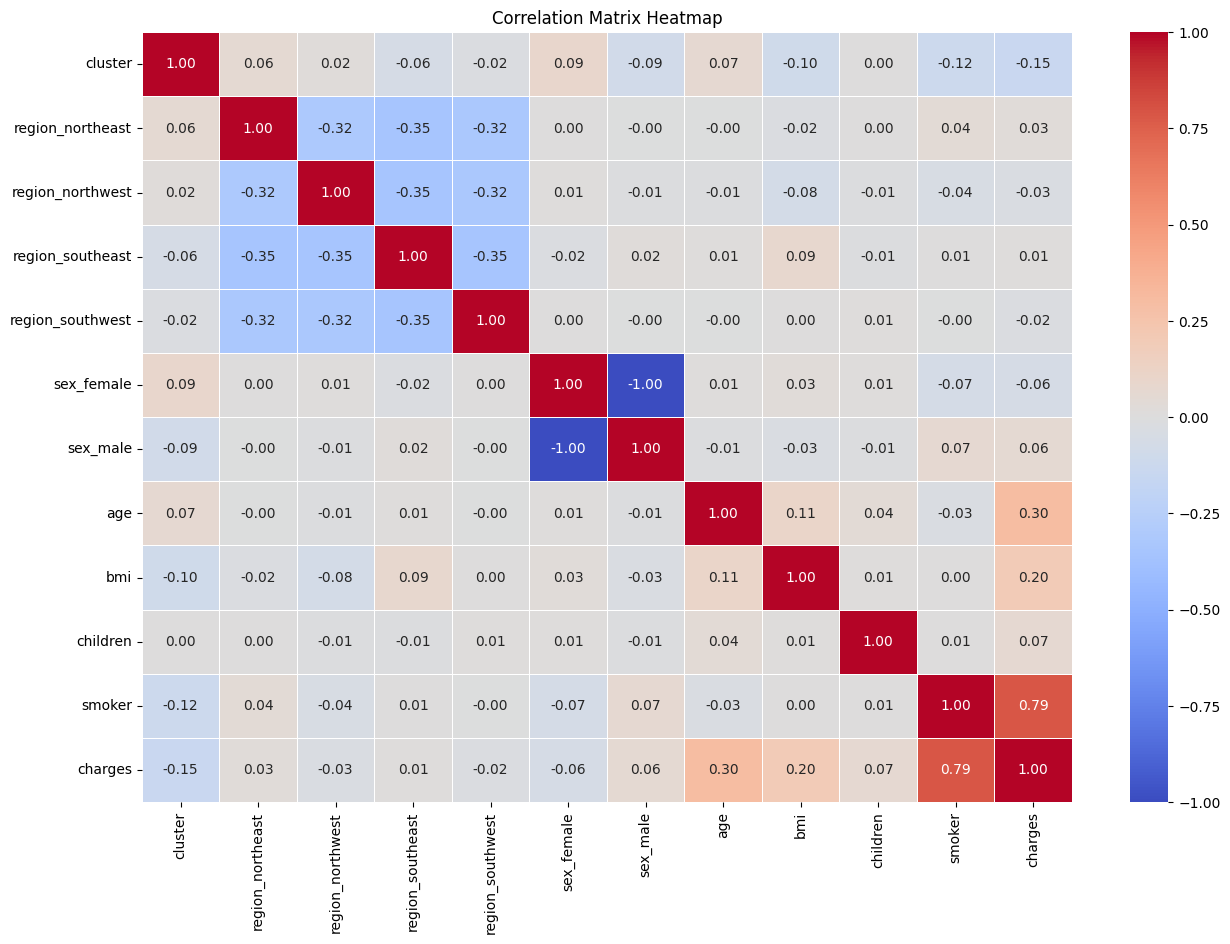

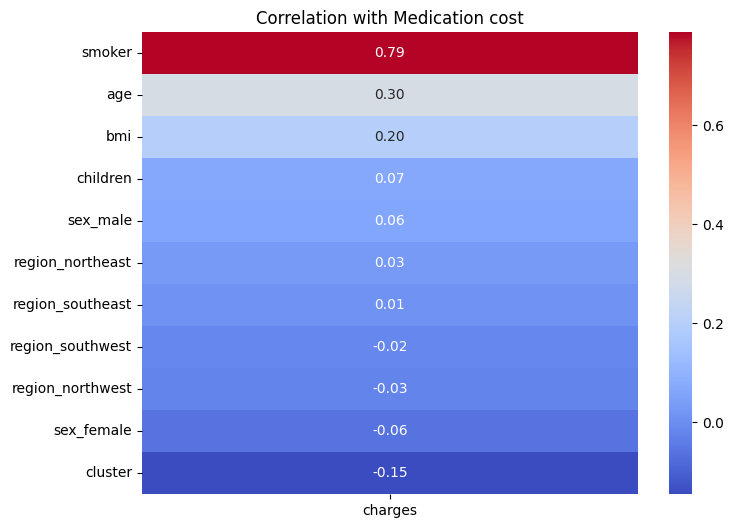

In [ ]:
correlation_matrix = processed_df.corr()

# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Sorting correlation values
target_corr = correlation_matrix['charges'].drop('charges')
target_corr_sorted = target_corr.sort_values(ascending=False)

# Correlation with Medication cost
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title("Correlation with Medication cost")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df.sex = label_encoder.fit_transform(df.sex)
df.smoker = label_encoder.fit_transform(df.smoker)
df.region = label_encoder.fit_transform(df.region)

df.head(10)

,age,sex,bmi,children,smoker,region,charges,cluster
0,19,0,27.900,0,1,3,16884.92400,2
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,2
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,1
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,1
8,37,1,29.830,2,0,0,6406.41070,1
9,60,0,25.840,0,0,1,28923.13692,0


Data Splitting

In [ ]:
x = df[df.columns[:6]]
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

Train-Validate-Test Split


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into test and the remaining (validation + train )
x_remaining, x_test, y_remaining, y_test = train_test_split(x, y, test_size=326, random_state=50)

# Split the remaining data into validation and traing sets
x_train, x_val, y_train, y_val = train_test_split(x_remaining, y_remaining, test_size=0.15, random_state=50)

In [ ]:
print("Training set size:", x_train.shape[0])
print("Validation set size:", x_val.shape[0])
print("Test set size:", x_test.shape[0])

Training set size: 859
Validation set size: 152
Test set size: 326


BUILDING MODELS


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

Training the model


In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_lr_val_pred = lr_model.predict(x_val)

# Evaluate the model on the validation set using R-squared
r2_lr_val = r2_score(y_val, y_lr_val_pred)
print(f"R2 Validation Accuracy: {round(r2_lr_val * 100,2)}%")

# Predict on the test set
y_lr_test_pred = lr_model.predict(x_test)

# Evaluate the model on the test set using R-squared
r2_lr_test = r2_score(y_test, y_lr_test_pred)
print(f"R2 Test Accuracy: {round(r2_lr_test * 100,2)}%")

y_lr_train_pred = lr_model.predict(x_train)

# Calculate the training accuracy
r2_lr_train = r2_score(y_train, y_lr_train_pred)
print(f"R2 Train Accuracy: {round(r2_lr_train * 100,2)}%")


R2 Validation Accuracy: 70.42%
R2 Test Accuracy: 79.33%
R2 Train Accuracy: 73.91%


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

# Predict on the validation set
y_lr_val_pred = lr_model.predict(x_val)

# Evaluate the model on the validation set using R-squared
r2_lr_val = r2_score(y_val, y_lr_val_pred)
print(f"R2 Validation Accuracy: {round(r2_lr_val * 100, 2)}%")

# Calculate and print other evaluation metrics for the validation set
mae_lr_val = mean_absolute_error(y_val, y_lr_val_pred)
print(f"Mean Absolute Error (MAE) on Validation Set: {mae_lr_val}")

mse_lr_val = mean_squared_error(y_val, y_lr_val_pred)
print(f"Mean Squared Error (MSE) on Validation Set: {mse_lr_val}")



# Predict on the test set
y_lr_test_pred = lr_model.predict(x_test)

# Evaluate the model on the test set using R-squared
r2_lr_test = r2_score(y_test, y_lr_test_pred)
print(f"R2 Test Accuracy: {round(r2_lr_test * 100, 2)}%")

# Calculate and print other evaluation metrics for the test set
mae_lr_test = mean_absolute_error(y_test, y_lr_test_pred)
print(f"Mean Absolute Error (MAE) on Test Set: {mae_lr_test}")

mse_lr_test = mean_squared_error(y_test, y_lr_test_pred)
print(f"Mean Squared Error (MSE) on Test Set: {mse_lr_test}")



# Predict on the training set
y_lr_train_pred = lr_model.predict(x_train)

# Calculate the training accuracy
r2_lr_train = r2_score(y_train, y_lr_train_pred)
print(f"R2 Train Accuracy: {round(r2_lr_train * 100, 2)}%")

# Calculate and print other evaluation metrics for the training set
mae_lr_train = mean_absolute_error(y_train, y_lr_train_pred)
print(f"Mean Absolute Error (MAE) on Training Set: {mae_lr_train}")

mse_lr_train = mean_squared_error(y_train, y_lr_train_pred)
print(f"Mean Squared Error (MSE) on Training Set: {mse_lr_train}")




R2 Validation Accuracy: 70.42%
Mean Absolute Error (MAE) on Validation Set: 3536.6120930725638
Mean Squared Error (MSE) on Validation Set: 29102579.975662407
R2 Test Accuracy: 79.33%
Mean Absolute Error (MAE) on Test Set: 3849.0958386419966
Mean Squared Error (MSE) on Test Set: 30072660.20099287
R2 Train Accuracy: 73.91%
Mean Absolute Error (MAE) on Training Set: 4442.594831821842
Mean Squared Error (MSE) on Training Set: 40392861.05041773


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=50)
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=50)

In [ ]:
# Evaluate the model on the validation set using R-squared
y_val_pred_rf = rf_model.predict(x_val)

r2_rf_val = r2_score(y_val, y_val_pred_rf)
print(f"R2 Validation Accuracy: {round(r2_rf_val * 100,2)}%")

# Evaluate the model on the test set using R-squared
y_test_pred_rf = rf_model.predict(x_test)

r2_test_rf = r2_score(y_test, y_test_pred_rf)
print(f"R2 Test Accuracy: {round(r2_test_rf * 100,2)}%")

# Evaluate the model on the test set using R-squared
y_train_pred_rf = rf_model.predict(x_train)

r2_train_rf = r2_score(y_train, y_train_pred_rf)
print(f"R2 Train Accuracy: {round(r2_train_rf * 100,2)}%")

R2 Validation Accuracy: 73.76%
R2 Test Accuracy: 88.38%
R2 Train Accuracy: 97.53%


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("validation:")
# Predict on the validation set
y_rf_val_pred = rf_model.predict(x_val)

# Evaluate the model on the validation set using R-squared
r2_rf_val = r2_score(y_val, y_rf_val_pred)
print(f"R2 Validation Accuracy: {round(r2_rf_val * 100, 2)}%")

# Calculate and print other evaluation metrics for the validation set
mae_rf_val = mean_absolute_error(y_val, y_rf_val_pred)
print(f"Mean Absolute Error (MAE) on Validation Set: {mae_rf_val}")

mse_rf_val = mean_squared_error(y_val, y_rf_val_pred)
print(f"Mean Squared Error (MSE) on Validation Set: {mse_rf_val}")

print("Test:")
# Predict on the test set
y_rf_test_pred = rf_model.predict(x_test)

# Evaluate the model on the test set using R-squared
r2_rf_test = r2_score(y_test, y_rf_test_pred)
print(f"R2 Test Accuracy: {round(r2_rf_test * 100, 2)}%")

# Calculate and print other evaluation metrics for the test set
mae_rf_test = mean_absolute_error(y_test, y_rf_test_pred)
print(f"Mean Absolute Error (MAE) on Test Set: {mae_rf_test}")

mse_rf_test = mean_squared_error(y_test, y_rf_test_pred)
print(f"Mean Squared Error (MSE) on Test Set: {mse_rf_test}")

print("Train:")

# Predict on the training set
y_rf_train_pred = rf_model.predict(x_train)

# Calculate the training accuracy
r2_rf_train = r2_score(y_train, y_rf_train_pred)
print(f"R2 Train Accuracy: {round(r2_rf_train * 100, 2)}%")

# Calculate and print other evaluation metrics for the training set
mae_rf_train = mean_absolute_error(y_train, y_rf_train_pred)
print(f"Mean Absolute Error (MAE) on Training Set: {mae_rf_train}")

mse_rf_train = mean_squared_error(y_train, y_rf_train_pred)
print(f"Mean Squared Error (MSE) on Training Set: {mse_rf_train}")


validation:
R2 Validation Accuracy: 73.76%
Mean Absolute Error (MAE) on Validation Set: 2793.7747838936034
Mean Squared Error (MSE) on Validation Set: 25815511.69371151
Test:
R2 Test Accuracy: 88.38%
Mean Absolute Error (MAE) on Test Set: 2586.737612807429
Mean Squared Error (MSE) on Test Set: 16903449.195046395
Train:
R2 Train Accuracy: 97.53%
Mean Absolute Error (MAE) on Training Set: 1120.714399619737
Mean Squared Error (MSE) on Training Set: 3827835.901343882


K NEAREST NEIGHBOUR

standardizing features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [ ]:
# Evaluate the model on the validation set using R-squared
y_val_pred_knn = knn_model.predict(x_val_scaled)

r2_val_knn = r2_score(y_val, y_val_pred_knn)
print(f"R2 Validation Accuracy: {round(r2_val_knn * 100,2)}%")

# Evaluate the model on the test set using R-squared
y_test_pred_knn = knn_model.predict(x_test_scaled)

r2_test_knn = r2_score(y_test, y_test_pred_knn)
print(f"R2 Test Accuracy: {round(r2_test_knn * 100,2)}%")

# Evaluate the model on the Trainig set using R-squared
y_train_pred_knn=knn_model.predict(x_train_scaled)

r2_train_knn=r2_score(y_train, y_train_pred_knn)
print(f"R2 Train Accuracy: {round(r2_train_knn * 100,2)}%")

R2 Validation Accuracy: 70.81%
R2 Test Accuracy: 84.17%
R2 Train Accuracy: 86.57%


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

# Predict on the validation set
print("Validation :")
y_knn_val_pred = knn_model.predict(x_val)

# Evaluate the model on the validation set using R-squared
r2__knn = r2_score(y_val, y_rf_val_pred)
print(f"R2 Validation Accuracy: {round(r2_val_knn * 100, 2)}%")

# Calculate and print other evaluation metrics for the validation set
mae_knn_val = mean_absolute_error(y_val, y_knn_val_pred)
print(f"Mean Absolute Error (MAE) on Validation Set: {mae_knn_val}")

mse_knn_val = mean_squared_error(y_val, y_knn_val_pred)
print(f"Mean Squared Error (MSE) on Validation Set: {mse_knn_val}")





print("Test :")
# Predict on the test set
y_knn_test_pred = knn_model.predict(x_test_scaled)

# Evaluate the model on the test set using R-squared
r2_knn_test = r2_score(y_test, y_knn_test_pred)
print(f"R2 Test Accuracy: {round(r2_knn_test * 100, 2)}%")

# Calculate and print other evaluation metrics for the test set
mae_knn_test = mean_absolute_error(y_test, y_knn_test_pred)
print(f"Mean Absolute Error (MAE) on Test Set: {mae_knn_test}")

mse_knn_test = mean_squared_error(y_test, y_knn_test_pred)
print(f"Mean Squared Error (MSE) on Test Set: {mse_knn_test}")



print("Train :")

# Predict on the training set
y_knn_train_pred = knn_model.predict(x_train_scaled)

# Calculate the training accuracy
r2_knn_train = r2_score(y_train, y_knn_train_pred)
print(f"R2 Train Accuracy: {round(r2_knn_train * 100, 2)}%")

# Calculate and print other evaluation metrics for the training set
mae_knn_train = mean_absolute_error(y_train, y_knn_train_pred)
print(f"Mean Absolute Error (MAE) on Training Set: {mae_knn_train}")

mse_knn_train = mean_squared_error(y_train, y_knn_train_pred)
print(f"Mean Squared Error (MSE) on Training Set: {mse_knn_train}")



Validation :
R2 Validation Accuracy: 70.81%
Mean Absolute Error (MAE) on Validation Set: 11632.98800375
Mean Squared Error (MSE) on Validation Set: 181868979.64467803
Test :
R2 Test Accuracy: 84.17%
Mean Absolute Error (MAE) on Test Set: 3010.052665974846
Mean Squared Error (MSE) on Test Set: 23023251.78285127
Train :
R2 Train Accuracy: 86.57%
Mean Absolute Error (MAE) on Training Set: 2789.499105723632
Mean Squared Error (MSE) on Training Set: 20786047.991027176


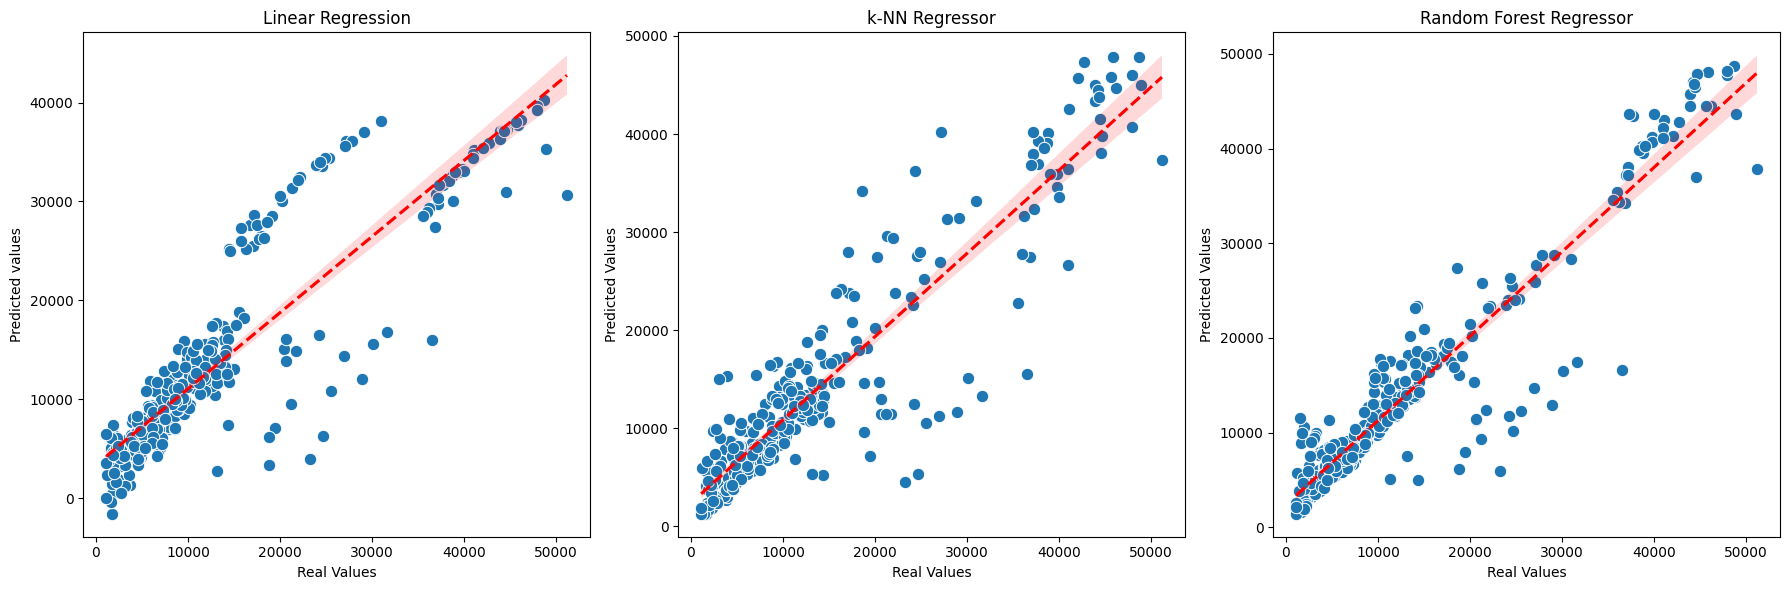

In [ ]:
predictions_lr = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_lr_test_pred, 'Model': 'Linear Regression'})
predictions_knn = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_test_pred_knn, 'Model': 'k-NN Regressor'})
predictions_rf = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_test_pred_rf, 'Model': 'Random Forest Regressor'})

# Create separate figures for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Linear Regression
sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_lr, ax=axes[0], s=80)
sns.regplot(x='Real Values', y='Predicted Values', data=predictions_lr, ax=axes[0], scatter=False, color='red', line_kws={'linestyle':'--'})
axes[0].set_title('Linear Regression')
axes[0].set_xlabel('Real Values')
axes[0].set_ylabel('Predicted values')

# Plot for k-NN Regressor
sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_knn, ax=axes[1], s=80)
sns.regplot(x='Real Values', y='Predicted Values', data=predictions_knn, ax=axes[1], scatter=False, color='red', line_kws={'linestyle':'--'})
axes[1].set_title('k-NN Regressor')
axes[1].set_xlabel('Real Values')
axes[1].set_ylabel('Predicted Values')

# Plot for Random Forest Regressor
sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_rf, ax=axes[2], s=80)
sns.regplot(x='Real Values', y='Predicted Values', data=predictions_rf, ax=axes[2], scatter=False, color='red', line_kws={'linestyle':'--'})
axes[2].set_title('Random Forest Regressor')
axes[2].set_xlabel('Real Values')
axes[2].set_ylabel('Predicted Values')

# Adjust layout
plt.tight_layout()
plt.show()

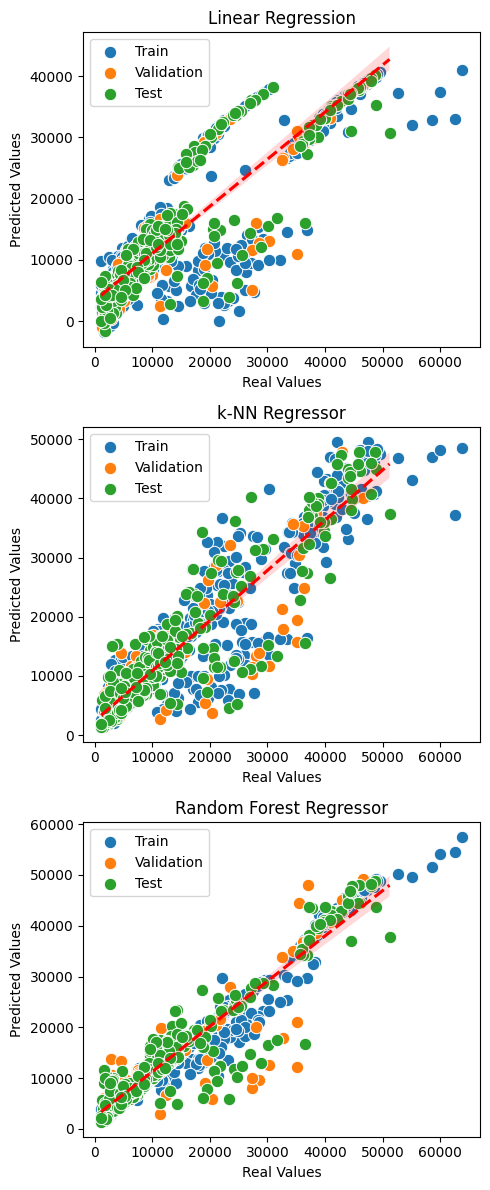

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score

# Assuming you have already calculated the predictions for the train, validation, and test sets for all three models

# Create DataFrames for each model and dataset
predictions_lr_train = pd.DataFrame({'Real Values': y_train, 'Predicted Values': y_lr_train_pred, 'Model': 'Linear Regression'})
predictions_lr_val = pd.DataFrame({'Real Values': y_val, 'Predicted Values': y_lr_val_pred, 'Model': 'Linear Regression'})
predictions_lr_test = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_lr_test_pred, 'Model': 'Linear Regression'})

predictions_knn_train = pd.DataFrame({'Real Values': y_train, 'Predicted Values': y_train_pred_knn, 'Model': 'k-NN Regressor'})
predictions_knn_val = pd.DataFrame({'Real Values': y_val, 'Predicted Values': y_val_pred_knn, 'Model': 'k-NN Regressor'})
predictions_knn_test = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_test_pred_knn, 'Model': 'k-NN Regressor'})

predictions_rf_train = pd.DataFrame({'Real Values': y_train, 'Predicted Values': y_train_pred_rf, 'Model': 'Random Forest Regressor'})
predictions_rf_val = pd.DataFrame({'Real Values': y_val, 'Predicted Values': y_val_pred_rf, 'Model': 'Random Forest Regressor'})
predictions_rf_test = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_test_pred_rf, 'Model': 'Random Forest Regressor'})

# Create separate figures for each model
fig, axes = plt.subplots(3, 1, figsize=(5,12))

# Plot for Linear Regression
sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_lr_train, ax=axes[0], s=80, label='Train')
sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_lr_val, ax=axes[0], s=80, label='Validation')
sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_lr_test, ax=axes[0], s=80, label='Test')
sns.regplot(x='Real Values', y='Predicted Values', data=predictions_lr_test, ax=axes[0], scatter=False, color='red', line_kws={'linestyle':'--'})
axes[0].set_title('Linear Regression')
axes[0].set_xlabel('Real Values')
axes[0].set_ylabel('Predicted Values')
axes[0].legend()

# Plot for k-NN Regressor
sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_knn_train, ax=axes[1], s=80, label='Train')
sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_knn_val, ax=axes[1], s=80, label='Validation')
sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_knn_test, ax=axes[1], s=80, label='Test')
sns.regplot(x='Real Values', y='Predicted Values', data=predictions_knn_test, ax=axes[1], scatter=False, color='red', line_kws={'linestyle':'--'})
axes[1].set_title('k-NN Regressor')
axes[1].set_xlabel('Real Values')
axes[1].set_ylabel('Predicted Values')
axes[1].legend()

# Plot for Random Forest Regressor
sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_rf_train, ax=axes[2], s=80, label='Train')
sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_rf_val, ax=axes[2], s=80, label='Validation')
sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_rf_test, ax=axes[2], s=80, label='Test')
sns.regplot(x='Real Values', y='Predicted Values', data=predictions_rf_test, ax=axes[2], scatter=False, color='red', line_kws={'linestyle':'--'})
axes[2].set_title('Random Forest Regressor')
axes[2].set_xlabel('Real Values')
axes[2].set_ylabel('Predicted Values')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


Extreme Gradient Boosting Model

In [ ]:
import pandas as pd
import zipfile
import numpy as np
import sklearn as sk
import xgboost as xgb

In [ ]:
# Encoding categorical variables
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
# encoding 'region' column
df['region'] = df['region'].map({'southeast':0,'southwest':1,'northeast':2,'northwest':3})

In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split
X = df.drop('charges', axis=1)
y = df['charges']
# Split the data into training and temporary data (80% train, 20% temporary )
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

# Split the temporary data into validation and test data (35% temp, 65% test)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.65, random_state=42)

In [ ]:
print("training set size : " , X_train.shape[0])
print("validation set size : " , X_validation.shape[0])
print("testing set size : ", X_test.shape[0])

training set size :  1002
validation set size :  117
testing set size :  218


In [ ]:
# Train XGBoost Model

xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.8)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region  cluster
0      19  NaN  27.900         0     NaN     NaN        2
1      18  NaN  33.770         1     NaN     NaN        1
2      28  NaN  33.000         3     NaN     NaN        1
3      33  NaN  22.705         0     NaN     NaN        2
4      32  NaN  28.880         0     NaN     NaN        1
...   ...  ...     ...       ...     ...     ...      ...
1333   50  NaN  30.970         3     NaN     NaN        1
1334   18  NaN  31.920         0     NaN     NaN        1
1335   18  NaN  36.850         0     NaN     NaN        1
1336   21  NaN  25.800         0     NaN     NaN        1
1337   61  NaN  29.070         0     NaN     NaN        0

[1337 rows x 7 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


In [ ]:
#xgb train and predict
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.8)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

#generate predictions for the vaidation set
y_validation_pred = xgb_model.predict(X_validation)

# Calculate R-squared for validation set
r2_validation = r2_score(y_validation, y_validation_pred) * 100

# Calculate R-squared for test set
r2_test = r2_score(y_test, y_pred) * 100


# Generate predictions for the training set
y_train_pred = xgb_model.predict(X_train)

# Calculate R-squared for train set
r2_train = r2_score(y_train, y_train_pred) * 100


# Print the evaluation metrics
print(f"R2 Validation Accuracy: {r2_validation:.2f}%")
print(f"R2 Test Accuracy: {r2_test:.2f}%")
print(f"R2 Train Accuracy: {r2_train:.2f}%")

R2 Validation Accuracy: 94.09%
R2 Test Accuracy: 95.47%
R2 Train Accuracy: 98.76%


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

#generate predictions for the vaidation set
y_validation_pred = xgb_model.predict(X_validation)

# Calculate R-squared for validation set
r2_validation = r2_score(y_validation, y_validation_pred) * 100
print(f"R2 Validation Accuracy: {r2_validation:.2f}%")

# mean absolute error (MAE) on validation set
mae_validation = mean_absolute_error(y_validation, y_validation_pred)
print(f"XGB Mean absolute error on validation set = {mae_validation}")

# mean squared error (MAE) on validation set
mse_validation = mean_squared_error(y_validation, y_validation_pred)
print(f"XGB Mean squared error on validation set = {mse_validation}")

# Calculate R-squared for test set
r2_test = r2_score(y_test, y_pred) * 100

print(f"R2 Test Accuracy: {r2_test:.2f}%")

#mae on test set
mae_test = mean_absolute_error(y_test, y_pred)
print(f"XGB Mean absolute error on test set = {mae_test}")

#mse on test set
print(f"XGB Mean squared error on test set = {mean_squared_error(y_test, y_pred)}")

# Generate predictions for the training set
y_train_pred = xgb_model.predict(X_train)

# Calculate R-squared for train set
r2_train = r2_score(y_train, y_train_pred) * 100


print(f"R2 Train Accuracy: {r2_train:.2f}%")

#MAE on training set
print(f"XGB Mean absolute error on train set = {mean_absolute_error(y_train, y_train_pred)}")

#MSE on training set
print(f"XGB Mean squared error on train set = {mean_squared_error(y_train, y_train_pred)}")

R2 Validation Accuracy: 90.82%
XGB Mean absolute error on validation set = 2296.2873305815633
XGB Mean squared error on validation set = 16029910.932505885
R2 Test Accuracy: 82.12%
XGB Mean absolute error on test set = 2694.9797925556372
XGB Mean squared error on test set = 24676246.210495047
R2 Train Accuracy: 95.39%
XGB Mean absolute error on train set = 1436.3046579643492
XGB Mean squared error on train set = 6681567.664579534


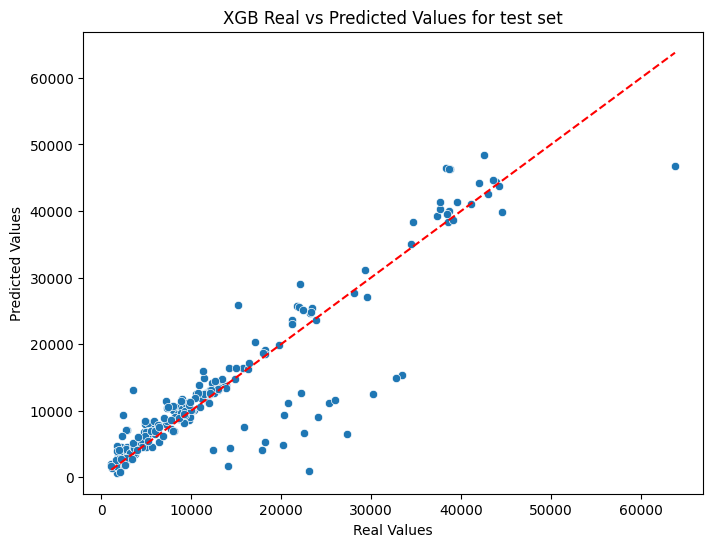

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

prediction_test_df = pd.DataFrame({'Real Values': y_test ,'Predicted Values': y_pred })

# Plot real values vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Real Values', y='Predicted Values', data= prediction_test_df)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('XGB Real vs Predicted Values for test set')

# Show the plot
plt.show()

Text(0.5, 1.0, 'XGB comparison plot')

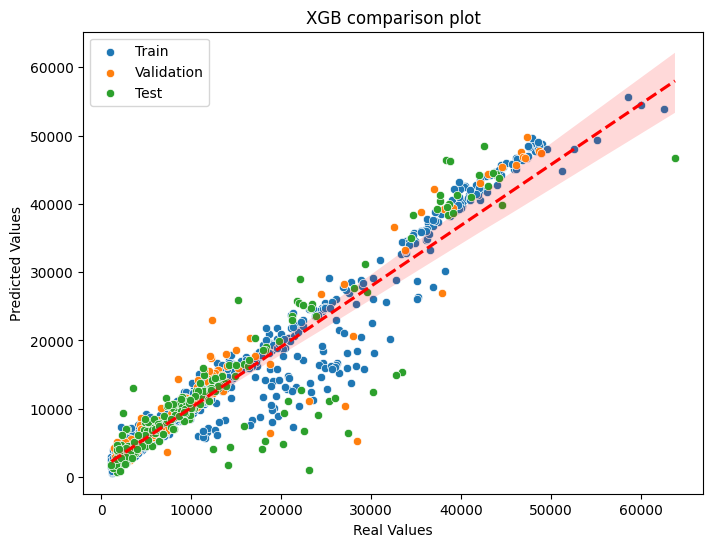

In [ ]:
# Create DataFrames for each set
predictions_train = pd.DataFrame({'Real Values': y_train, 'Predicted Values': y_train_pred})
predictions_validation = pd.DataFrame({'Real Values': y_validation, 'Predicted Values': y_validation_pred})
predictions_test = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_pred})


# Plot

plt.figure(figsize=(8, 6))

sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_train, label='Train')
sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_validation, label='Validation')
sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_test, label='Test')
sns.regplot(x='Real Values', y='Predicted Values', data=predictions_test, scatter=False, color='red', line_kws={'linestyle':'--'})
plt.title('XGB comparison plot')

**STOCHASTIC GRADIENT DESCENT**





1. IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

2. LOADING AND DISPLAYING THE DATASET


In [ ]:
# Load the dataset
data = pd.read_csv("/content/insurance.csv")

# Display the first few rows of the dataset
print("Dataset preview:")
print(data.head())

Dataset preview:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


3. CHECKING MISSING VALUES

In [ ]:
#checking missing values
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


4. FEATURE SPLITTING AND PRE-PROCESSING

In [ ]:
labelencoder = LabelEncoder()
data['sex'] = labelencoder.fit_transform(data['sex'])
data['smoker'] = labelencoder.fit_transform(data['smoker'])
data['region'] = labelencoder.fit_transform(data['region'])

In [ ]:
# Feature Splitting
X = data.drop('charges', axis=1)
y = data['charges']
print(X)
print(y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
X_remaining, X_test, y_remaining, y_test = train_test_split(X, y, test_size=326, random_state=50)

X_train, X_validation, y_train, y_validation = train_test_split(X_remaining, y_remaining, test_size=0.15, random_state=50)

labelencoder = LabelEncoder()

X_train['sex'] = labelencoder.fit_transform(X_train['sex'])
X_validation['sex'] = labelencoder.transform(X_validation['sex'])
X_test['sex'] = labelencoder.transform(X_test['sex'])
X_train['smoker'] = labelencoder.fit_transform(X_train['smoker'])
X_validation['smoker'] = labelencoder.transform(X_validation['smoker'])
X_test['smoker'] = labelencoder.transform(X_test['smoker'])
X_train['region'] = labelencoder.fit_transform(X_train['region'])
X_validation['region'] = labelencoder.transform(X_validation['region'])
X_test['region'] = labelencoder.transform(X_test['region'])


# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)



# Add a column of ones to the X_train for the bias term
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_validation_scaled = np.c_[np.ones((X_validation_scaled.shape[0], 1)), X_validation_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

5. DEFINING STOCHASTIC GRADIENT DESCENT

In [ ]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = X.shape[0]  # number of samples
    n = X.shape[1]  # number of features
    theta = np.random.randn(n)  # initialize the parameters

    for iteration in range(n_iterations):
        # Shuffle the dataset
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_shuffled[random_index:random_index+1]
            yi = y_shuffled[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients

    return theta

6. TRAINING THE MODEL

In [ ]:
# Set hyperparameters
learning_rate = 0.01
n_iterations = 1000

# Train the model
theta = stochastic_gradient_descent(X_train_scaled, y_train.to_numpy(), learning_rate, n_iterations)
print("Optimal parameters:")
print(theta)

Optimal parameters:
[13315.84579136  2968.22533267   -83.58023611  2397.80919257
    73.74807797  9095.90277488  -252.79179437]


7. MAKING PREDICTIONS

In [ ]:
def predict(X, theta):
    return X.dot(theta)

# Make predictions
y_train_pred = predict(X_train_scaled, theta)
y_validation_pred = predict(X_validation_scaled, theta)
y_test_pred = predict(X_test_scaled, theta)

8. EVALUATING THE MODEL

In [ ]:
# Calculate R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_validation = r2_score(y_validation, y_validation_pred)
r2_test = r2_score(y_test, y_test_pred)

#Calculate MSE and MAE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_validation = mean_squared_error(y_validation, y_validation_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_validation = mean_absolute_error(y_validation, y_validation_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)


print("\nValidation:")
print("R-squared: {:.2f}%".format(r2_validation*100))
print("Mean Squared Error", mse_validation)
print("Mean Absolute Error:", mae_validation)

print("\nTest:")
print("R-squared: {:.2f}%".format(r2_test * 100))
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)

print("\nTrain:")
print("R-squared: {:.2f}%".format(r2_train * 100))
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)


Validation:
R-squared: 66.39%
Mean Squared Error 27835525.7330564
Mean Absolute Error: 3884.58392881402

Test:
R-squared: 77.33%
Mean Squared Error: 33669258.964209214
Mean Absolute Error: 4110.5627560514495

Train:
R-squared: 73.69%
Mean Squared Error: 41028170.61984131
Mean Absolute Error: 4583.504187499157


9. DATA VISUALISATION

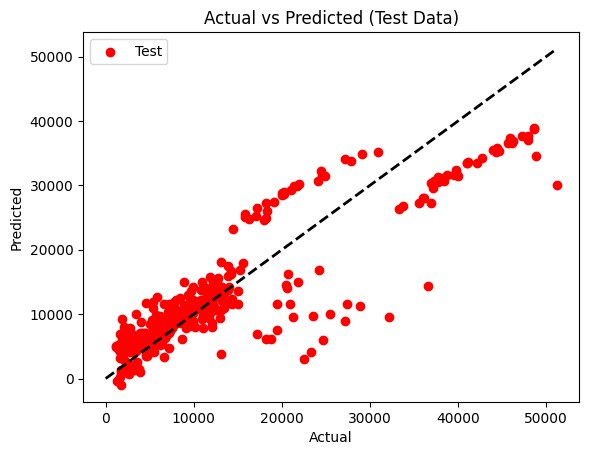

In [ ]:
# Scatter plot for test data
plt.scatter(y_test, y_test_pred, color='red', label='Test')

# Adding a line representing perfect prediction
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([0, max_val], [0, max_val], color='black', linestyle='--', linewidth=2)

# Labels and legend
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Test Data)')
plt.legend()

# Show plot
plt.show()

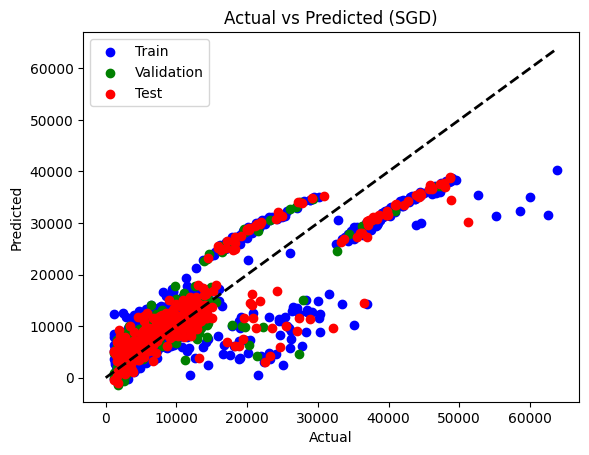

In [ ]:
# Scatter plot for SGD predictions on training data
plt.scatter(y_train, y_train_pred, color='blue', label='Train')

# Scatter plot for SGD predictions on validation data
plt.scatter(y_validation, y_validation_pred, color='green', label='Validation')

# Scatter plot for SGD predictions on test data
plt.scatter(y_test, y_test_pred, color='red', label='Test')

# Adding a line representing perfect prediction
max_val = max(max(y_train.max(), y_validation.max(), y_test.max()), max(y_train_pred.max(), y_validation_pred.max(), y_test_pred.max()))
plt.plot([0, max_val], [0, max_val], color='black', linestyle='--', linewidth=2)

# Labels and legend
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (SGD)')
plt.legend()

# Show plot
plt.show()

NEURAL NETWORK

1. READING THE DATSETS

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
dataset = pd.read_csv('/content/archive (5).zip')

In [ ]:
dataset

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

X represents the features used for prediction, and Y represents the actual prices to be predicted.

In [ ]:
X = dataset.iloc[:, 0:6].values  # features or independent variables from the dataset ,  pandas DataFrame method used for integer-location based indexing.
Y = dataset.iloc[:, -1].values   # extracting the target variable

In [ ]:
X



array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.8, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.9, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.1, 0, 'yes', 'northwest']], dtype=object)

In [ ]:
Y

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

ENCODING COLUMNS

transform categorical labels into numerical labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                 #  transform categorical labels into numerical labels
X[:, 1] = le.fit_transform(X[:, 1]) #This line encodes the values in the second column (index 1) of the feature matrix X
X[:, 4] = le.fit_transform(X[:, 4])
X[:, 5] = le.fit_transform(X[:, 5])

used to represent the features or independent variables of a dataset.

In [ ]:
X

array([[19, 0, 27.9, 0, 1, 3],
       [18, 1, 33.8, 1, 0, 2],
       [28, 1, 33.0, 3, 0, 2],
       ...,
       [18, 0, 36.9, 0, 0, 2],
       [21, 0, 25.8, 0, 0, 3],
       [61, 0, 29.1, 0, 1, 1]], dtype=object)

SCALING FEAUTURES- distance-based calculations  to ensure that all features contribute equally to the model training process and to prevent any one feature from dominating due to its larger scale.

In [ ]:
from sklearn.preprocessing import MinMaxScaler   #is a method used for scaling numerical features to a specified range, usually between 0 and 1.
sc = MinMaxScaler()   #calculates the minimum and maximum values of each feature in X.
X = sc.fit_transform(X)


In [ ]:
X

array([[0.02173913, 0.        , 0.32075472, 0.        , 1.        ,
        1.        ],
       [0.        , 1.        , 0.47978437, 0.2       , 0.        ,
        0.66666667],
       [0.2173913 , 1.        , 0.45822102, 0.6       , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.56334232, 0.        , 0.        ,
        0.66666667],
       [0.06521739, 0.        , 0.26415094, 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.        , 0.35309973, 0.        , 1.        ,
        0.33333333]])

In [ ]:
Y = Y.reshape(-1, 1)
Y = sc.fit_transform(Y)

In [ ]:
Y

array([[0.25161073],
       [0.00963598],
       [0.05311519],
       ...,
       [0.00810809],
       [0.01414366],
       [0.44724875]])

SPLITTING DATASET

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, random_state=42)

In [ ]:
X_train.shape


(1070, 6)

In [ ]:
X_test.shape

(268, 6)

CREATING MODEL

In [ ]:
from tensorflow.keras.models import Sequential #create a neural network by adding layers sequentially.
from tensorflow.keras.layers import Dense      #represents a fully connected layer
from tensorflow.keras.optimizers import Adam   #training neural networks

In [ ]:
# define the keras model
model = Sequential(name='sequential_1')
model.add(Dense(12, input_dim=6, activation='relu', name='dense_1'))
model.add(Dense(1,  activation='linear', name='output'))
# compile the keras model
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mae'])

In [ ]:
model.optimizer.get_config() #retrieves the optimizer object

{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 output (Dense)              (None, 1)                 13        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


TRAINING MODEL

In [ ]:
hist = model.fit(X_train, Y_train, epochs=100, batch_size=107)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.1280 - mae: 0.2967
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0840 - mae: 0.2350
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0583 - mae: 0.1944
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0468 - mae: 0.1744
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0396 - mae: 0.1596
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0341 - mae: 0.1456
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0294 - mae: 0.1330
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0259 - mae: 0.1229
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0232 - mae: 0.1150
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0213 - mae: 0.1098
Epoch 11/100
10/10 [==============================] - 0s 3m

In [ ]:
hist.history.keys()

dict_keys(['loss', 'mae'])

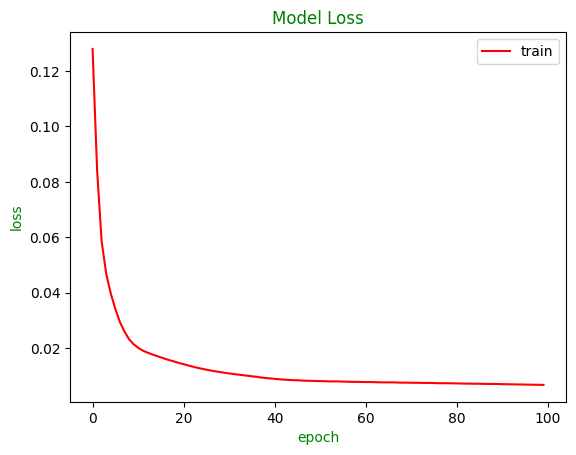

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
# plot training loss
loss = hist.history['loss']
plt.plot(loss, color='red')
plt.title('Model Loss', color='green')
plt.ylabel('loss', color='green')
plt.xlabel('epoch', color='green')
plt.legend(['train'], loc='upper right')
plt.show()
plt.savefig('loss_curve.png')

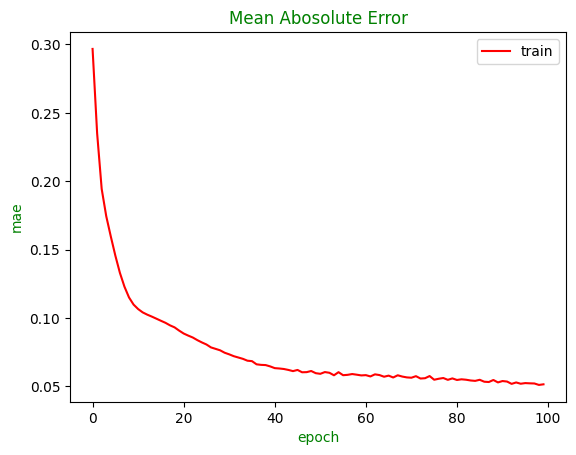

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot training loss
mae = hist.history['mae']
plt.plot(mae, color='red')
plt.title('Mean Abosolute Error', color='green')
plt.ylabel('mae', color='green')
plt.xlabel('epoch', color='green')
plt.legend(['train'], loc='upper right')
plt.show()
plt.savefig('mae_curve.png')

EVALUATING MODEL

In [ ]:
history_test = model.evaluate(X_test, Y_test, batch_size=107)

3/3 [==============================] - 0s 4ms/step - loss: 0.0059 - mae: 0.0487


In [ ]:
history_train = model.evaluate(X_train, Y_train, batch_size=107)

10/10 [==============================] - 0s 2ms/step - loss: 0.0066 - mae: 0.0520


In [ ]:
history_test

[0.005883435718715191, 0.04868486151099205]

In [ ]:
history_train   #variable containing the training history of the model

[0.0066260830499231815, 0.051965828984975815]

ACCURACY

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Assuming you have loaded and preprocessed your dataset into X and Y

# Split the dataset into train, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Define your neural network model
model = Sequential([
    Dense(12, input_dim=X_train.shape[1], activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_val, Y_val), verbose=0)

# Evaluate the model
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

# Calculate R2 scores
r2_train = r2_score(Y_train, train_predictions)
r2_val = r2_score(Y_val, val_predictions)
r2_test = r2_score(Y_test, test_predictions)

# Convert R2 scores to percentages
r2_train_percent = r2_train * 100
r2_val_percent = r2_val * 100
r2_test_percent = r2_test * 100

print("R2 Train Accuracy:", r2_train_percent)
print("R2 Validation Accuracy:", r2_val_percent)
print("R2 Test Accuracy:", r2_test_percent)



7/7 [==============================] - 0s 2ms/step
R2 Train Accuracy: 83.73051834248099
R2 Validation Accuracy: 85.13333452505961
R2 Test Accuracy: 85.34187292509394


PLOT

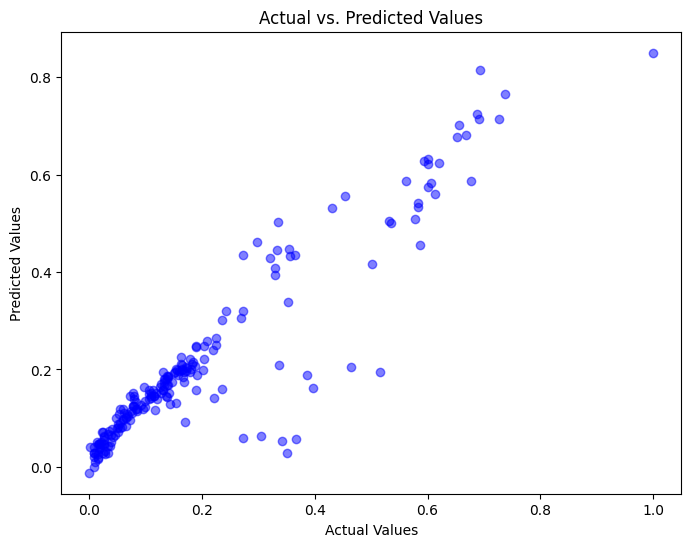

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have actual and predicted values for the test set
actual_values = Y_test
predicted_values = test_predictions

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model on validation set
val_loss = model.evaluate(X_val, Y_val, verbose=0)
val_predictions = model.predict(X_val)
val_mae = mean_absolute_error(Y_val, val_predictions)
val_mse = mean_squared_error(Y_val, val_predictions)
val_r2 = r2_score(Y_val, val_predictions)

# Evaluate the model on test set
test_loss = model.evaluate(X_test, Y_test, verbose=0)
test_predictions = model.predict(X_test)
test_mae = mean_absolute_error(Y_test, test_predictions)
test_mse = mean_squared_error(Y_test, test_predictions)
test_r2 = r2_score(Y_test, test_predictions)

# Evaluate the model on train set
train_loss = model.evaluate(X_train, Y_train, verbose=0)
train_predictions = model.predict(X_train)
train_mae = mean_absolute_error(Y_train, train_predictions)
train_mse = mean_squared_error(Y_train, train_predictions)
train_r2 = r2_score(Y_train, train_predictions)

# Print the results
print("R2 Validation Accuracy:", val_r2)
print("Mean Absolute Error (MAE) on Validation Set:", val_mae)
print("Mean Squared Error (MSE) on Validation Set:", val_mse)

print("R2 Test Accuracy:", test_r2)
print("Mean Absolute Error (MAE) on Test Set:", test_mae)
print("Mean Squared Error (MSE) on Test Set:", test_mse)

print("R2 Train Accuracy:", train_r2)
print("Mean Absolute Error (MAE) on Training Set:", train_mae)
print("Mean Squared Error (MSE) on Training Set:", train_mse)

30/30 [==============================] - 0s 1ms/step
R2 Validation Accuracy: 0.8513333452505961
Mean Absolute Error (MAE) on Validation Set: 0.04904234580376484
Mean Squared Error (MSE) on Validation Set: 0.0053435872992189295
R2 Test Accuracy: 0.8534187292509394
Mean Absolute Error (MAE) on Test Set: 0.05058271191129025
Mean Squared Error (MSE) on Test Set: 0.005663649399533302
R2 Train Accuracy: 0.83730518342481
Mean Absolute Error (MAE) on Training Set: 0.05291104030781718
Mean Squared Error (MSE) on Training Set: 0.006071492278262293
